In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# data loading
data = pd.read_csv('youtubedata.csv')
data = data.iloc[:,1:]
data

,1,2,3,4,5,6,7,8,9,10
0,노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),노래(음악)
1,게임,학습,TV 예능 클립,토크,먹방,노래(음악),유튜브 예능,브이로그,ASMR,강연
2,게임,강연,학습,노래(음악),토크,유튜브 예능,애니메이션,영화 관련 영상,스포츠,TV 예능 클립
3,유튜브 예능,게임,토크,노래(음악),영화 관련 영상,먹방,버츄얼 유튜버,애니메이션,댄스,웹드라마
4,버츄얼 유튜버,토크,유튜브 예능,TV 예능 클립,노래(음악),먹방,전자기기(IT리뷰),게임,유튜브 예능,웹드라마
...,...,...,...,...,...,...,...,...,...,...
69,애니메이션,애니메이션,브이로그,유튜브 예능,TV 예능 클립,TV 예능 클립,노래(음악),학습,게임,학습
70,영화 관련 영상,학습,먹방,유튜브 예능,TV 예능 클립,전자기기(IT리뷰),스포츠,영화 관련 영상,게임,토크
71,노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),토크,브이로그,TV 예능 클립,노래(음악),먹방
72,게임,TV 예능 클립,TV 예능 클립,먹방,노래(음악),노래(음악),노래(음악),노래(음악),노래(음악),TV 예능 클립


In [ ]:
dic = {}
for i in range(74):
  for j in data.iloc[i,:]:
    if j not in dic:
      dic[j] = 1
    else:
      dic[j] += 1
dic

{'ASMR': 18,
 'TV 예능 클립': 62,
 '강연': 24,
 '게임': 49,
 '노래(음악)': 157,
 '뉴스': 3,
 '댄스': 31,
 '드라마': 26,
 '먹방': 26,
 '버츄얼 유튜버': 3,
 '뷰티 유튜버': 19,
 '브이로그': 32,
 '스포츠': 66,
 '애니메이션': 19,
 '영화 관련 영상': 32,
 '웹드라마': 21,
 '유튜브 예능': 45,
 '전자기기(IT리뷰)': 14,
 '토크': 41,
 '학습': 52}

In [ ]:
# make type list
data1 = data.drop_duplicates(['1'])
typelist = data1.iloc[:,0].tolist()
typelist.append('댄스')
typelist.append('뷰티 유튜버')
typelist

['노래(음악)',
 '게임',
 '유튜브 예능',
 '버츄얼 유튜버',
 '토크',
 '브이로그',
 '드라마',
 'ASMR',
 '학습',
 '뉴스',
 '웹드라마',
 'TV 예능 클립',
 '스포츠',
 '애니메이션',
 '전자기기(IT리뷰)',
 '강연',
 '영화 관련 영상',
 '먹방',
 '댄스',
 '뷰티 유튜버']

In [ ]:
# number of total movement
L = []
for i in range(9):
  for j in range(74):
    L.append((data.iloc[j,i], data.iloc[j,i+1]))
len(L)

666

In [ ]:
for i in L:
  if i[0] == '뉴스' or i[1] == '뉴스' or i[0] == '버츄얼 유튜버' or i[1] == '버츄얼 유튜버':
    L.remove(i)
len(L)

657

In [ ]:
# frequency of each connection
count = {}
for i in L:
  try: count[i] += 1
  except: count[i] = 1
print(count)

{('노래(음악)', '노래(음악)'): 70, ('게임', '학습'): 3, ('게임', '강연'): 1, ('유튜브 예능', '게임'): 3, ('토크', '유튜브 예능'): 7, ('게임', '영화 관련 영상'): 1, ('노래(음악)', '게임'): 2, ('노래(음악)', '댄스'): 10, ('노래(음악)', 'TV 예능 클립'): 10, ('게임', '스포츠'): 3, ('토크', '노래(음악)'): 7, ('게임', '게임'): 10, ('게임', '유튜브 예능'): 6, ('브이로그', '유튜브 예능'): 3, ('노래(음악)', '유튜브 예능'): 6, ('노래(음악)', '스포츠'): 16, ('드라마', '드라마'): 6, ('ASMR', '학습'): 2, ('브이로그', '노래(음악)'): 4, ('학습', '강연'): 4, ('학습', '학습'): 15, ('ASMR', 'ASMR'): 2, ('웹드라마', 'ASMR'): 1, ('유튜브 예능', '유튜브 예능'): 2, ('토크', '학습'): 3, ('드라마', '노래(음악)'): 3, ('학습', '스포츠'): 5, ('TV 예능 클립', '유튜브 예능'): 5, ('스포츠', '노래(음악)'): 10, ('스포츠', '스포츠'): 22, ('노래(음악)', '브이로그'): 4, ('게임', '노래(음악)'): 1, ('드라마', '웹드라마'): 7, ('노래(음악)', '학습'): 6, ('애니메이션', '영화 관련 영상'): 2, ('브이로그', '전자기기(IT리뷰)'): 1, ('전자기기(IT리뷰)', '노래(음악)'): 1, ('강연', '강연'): 3, ('TV 예능 클립', 'TV 예능 클립'): 14, ('게임', '애니메이션'): 3, ('영화 관련 영상', '드라마'): 2, ('먹방', '유튜브 예능'): 3, ('TV 예능 클립', '노래(음악)'): 13, ('애니메이션', '애니메이션'): 3, ('영화 관련 영상', '학습'): 2, ('게임', 'TV 

In [ ]:
# transition matrix
matrix = pd.DataFrame()

for x in typelist:
    matrix[x] = pd.DataFrame([count.get((x,y), 0) for y in typelist], index=typelist)

matrix = matrix.drop(['버츄얼 유튜버', '뉴스'], axis = 1)
matrix = matrix.drop(['버츄얼 유튜버', '뉴스'], axis = 0)
matrix.shape

(18, 18)

In [ ]:
matrix

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
노래(음악),70,1,3,7,4,3,3,5,1,13,10,1,1,1,1,2,3,0
게임,2,10,3,2,0,0,2,4,2,3,3,1,1,1,2,0,1,1
유튜브 예능,6,6,2,7,3,0,0,1,5,5,0,1,1,1,0,3,2,0
토크,7,5,4,4,2,0,1,1,1,2,2,1,1,1,4,0,0,1
브이로그,4,1,7,4,4,0,0,0,0,0,2,2,0,0,0,0,1,4
드라마,0,1,0,1,0,6,0,0,0,3,3,1,0,0,2,2,4,0
ASMR,1,0,2,0,1,2,2,2,1,0,0,0,0,1,1,0,0,0
학습,6,3,0,3,1,1,2,15,2,2,3,1,1,3,2,0,2,0
웹드라마,3,0,3,0,1,7,0,0,0,3,1,1,0,0,0,0,1,0
TV 예능 클립,10,2,8,0,4,2,0,4,3,14,2,0,1,3,1,1,3,0


In [ ]:
matrix_prob = matrix.div(matrix.sum(axis=1), axis=0)

In [ ]:
matrix_prob

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
노래(음악),0.542636,0.007752,0.023256,0.054264,0.031008,0.023256,0.023256,0.038760,0.007752,0.100775,0.077519,0.007752,0.007752,0.007752,0.007752,0.015504,0.023256,0.000000
게임,0.052632,0.263158,0.078947,0.052632,0.000000,0.000000,0.052632,0.105263,0.052632,0.078947,0.078947,0.026316,0.026316,0.026316,0.052632,0.000000,0.026316,0.026316
유튜브 예능,0.139535,0.139535,0.046512,0.162791,0.069767,0.000000,0.000000,0.023256,0.116279,0.116279,0.000000,0.023256,0.023256,0.023256,0.000000,0.069767,0.046512,0.000000
토크,0.189189,0.135135,0.108108,0.108108,0.054054,0.000000,0.027027,0.027027,0.027027,0.054054,0.054054,0.027027,0.027027,0.027027,0.108108,0.000000,0.000000,0.027027
브이로그,0.137931,0.034483,0.241379,0.137931,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.068966,0.000000,0.000000,0.000000,0.000000,0.034483,0.137931
드라마,0.000000,0.043478,0.000000,0.043478,0.000000,0.260870,0.000000,0.000000,0.000000,0.130435,0.130435,0.043478,0.000000,0.000000,0.086957,0.086957,0.173913,0.000000
ASMR,0.076923,0.000000,0.153846,0.000000,0.076923,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000
학습,0.127660,0.063830,0.000000,0.063830,0.021277,0.021277,0.042553,0.319149,0.042553,0.042553,0.063830,0.021277,0.021277,0.063830,0.042553,0.000000,0.042553,0.000000
웹드라마,0.150000,0.000000,0.150000,0.000000,0.050000,0.350000,0.000000,0.000000,0.000000,0.150000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000
TV 예능 클립,0.172414,0.034483,0.137931,0.000000,0.068966,0.034483,0.000000,0.068966,0.051724,0.241379,0.034483,0.000000,0.017241,0.051724,0.017241,0.017241,0.051724,0.000000


In [ ]:
matrix_prob.loc[['게임'],:]=matrix_prob.loc[['게임'],:]*0.5

In [ ]:
matrix_prob.loc[['게임'],:]

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
게임,0.026316,0.131579,0.039474,0.026316,0.0,0.0,0.026316,0.052632,0.026316,0.039474,0.039474,0.013158,0.013158,0.013158,0.026316,0.0,0.013158,0.013158


In [ ]:
matrix_prob.loc[['게임'],:]=matrix_prob.loc[['게임'],:]*2

In [ ]:
matrix_prob.loc[['게임'],:]

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
게임,0.052632,0.263158,0.078947,0.052632,0.0,0.0,0.052632,0.105263,0.052632,0.078947,0.078947,0.026316,0.026316,0.026316,0.052632,0.0,0.026316,0.026316


In [ ]:
print(matrix_prob.to_numpy())

[[0.54263566 0.00775194 0.02325581 0.05426357 0.03100775 0.02325581
  0.02325581 0.03875969 0.00775194 0.10077519 0.07751938 0.00775194
  0.00775194 0.00775194 0.00775194 0.01550388 0.02325581 0.        ]
 [0.05263158 0.26315789 0.07894737 0.05263158 0.         0.
  0.05263158 0.10526316 0.05263158 0.07894737 0.07894737 0.02631579
  0.02631579 0.02631579 0.05263158 0.         0.02631579 0.02631579]
 [0.13953488 0.13953488 0.04651163 0.1627907  0.06976744 0.
  0.         0.02325581 0.11627907 0.11627907 0.         0.02325581
  0.02325581 0.02325581 0.         0.06976744 0.04651163 0.        ]
 [0.18918919 0.13513514 0.10810811 0.10810811 0.05405405 0.
  0.02702703 0.02702703 0.02702703 0.05405405 0.05405405 0.02702703
  0.02702703 0.02702703 0.10810811 0.         0.         0.02702703]
 [0.13793103 0.03448276 0.24137931 0.13793103 0.13793103 0.
  0.         0.         0.         0.         0.06896552 0.06896552
  0.         0.         0.         0.         0.03448276 0.13793103]
 [0.   

In [ ]:
import warnings  
warnings.filterwarnings(action = 'ignore')

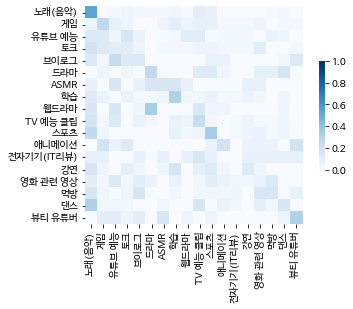

In [ ]:
# heatmap of transition matrix
sns.heatmap(matrix_prob, cmap='Blues', vmin=0, vmax=1, center=.5,
            square=True, cbar_kws={"shrink": .5},
            xticklabels = 1, yticklabels = 1)

In [ ]:
a=np.round(matrix_prob, 2)

In [ ]:
a

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
노래(음악),0.54,0.01,0.02,0.05,0.03,0.02,0.02,0.04,0.01,0.10,0.08,0.01,0.01,0.01,0.01,0.02,0.02,0.00
게임,0.05,0.26,0.08,0.05,0.00,0.00,0.05,0.11,0.05,0.08,0.08,0.03,0.03,0.03,0.05,0.00,0.03,0.03
유튜브 예능,0.14,0.14,0.05,0.16,0.07,0.00,0.00,0.02,0.12,0.12,0.00,0.02,0.02,0.02,0.00,0.07,0.05,0.00
토크,0.19,0.14,0.11,0.11,0.05,0.00,0.03,0.03,0.03,0.05,0.05,0.03,0.03,0.03,0.11,0.00,0.00,0.03
브이로그,0.14,0.03,0.24,0.14,0.14,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0.00,0.00,0.00,0.00,0.03,0.14
드라마,0.00,0.04,0.00,0.04,0.00,0.26,0.00,0.00,0.00,0.13,0.13,0.04,0.00,0.00,0.09,0.09,0.17,0.00
ASMR,0.08,0.00,0.15,0.00,0.08,0.15,0.15,0.15,0.08,0.00,0.00,0.00,0.00,0.08,0.08,0.00,0.00,0.00
학습,0.13,0.06,0.00,0.06,0.02,0.02,0.04,0.32,0.04,0.04,0.06,0.02,0.02,0.06,0.04,0.00,0.04,0.00
웹드라마,0.15,0.00,0.15,0.00,0.05,0.35,0.00,0.00,0.00,0.15,0.05,0.05,0.00,0.00,0.00,0.00,0.05,0.00
TV 예능 클립,0.17,0.03,0.14,0.00,0.07,0.03,0.00,0.07,0.05,0.24,0.03,0.00,0.02,0.05,0.02,0.02,0.05,0.00


In [ ]:
# MCL - make diagonal to 1
for i in range(18):
  a.iloc[i][i] = 1
a
# MCL - Normalize matrix by column
b = a.div(a.sum(axis=0), axis=1)
b

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
노래(음악),1.00,0.01,0.02,0.05,0.03,0.02,0.02,0.04,0.01,0.10,0.08,0.01,0.01,0.01,0.01,0.02,0.02,0.00
게임,0.05,1.00,0.08,0.05,0.00,0.00,0.05,0.11,0.05,0.08,0.08,0.03,0.03,0.03,0.05,0.00,0.03,0.03
유튜브 예능,0.14,0.14,1.00,0.16,0.07,0.00,0.00,0.02,0.12,0.12,0.00,0.02,0.02,0.02,0.00,0.07,0.05,0.00
토크,0.19,0.14,0.11,1.00,0.05,0.00,0.03,0.03,0.03,0.05,0.05,0.03,0.03,0.03,0.11,0.00,0.00,0.03
브이로그,0.14,0.03,0.24,0.14,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0.00,0.00,0.00,0.00,0.03,0.14
드라마,0.00,0.04,0.00,0.04,0.00,1.00,0.00,0.00,0.00,0.13,0.13,0.04,0.00,0.00,0.09,0.09,0.17,0.00
ASMR,0.08,0.00,0.15,0.00,0.08,0.15,1.00,0.15,0.08,0.00,0.00,0.00,0.00,0.08,0.08,0.00,0.00,0.00
학습,0.13,0.06,0.00,0.06,0.02,0.02,0.04,1.00,0.04,0.04,0.06,0.02,0.02,0.06,0.04,0.00,0.04,0.00
웹드라마,0.15,0.00,0.15,0.00,0.05,0.35,0.00,0.00,1.00,0.15,0.05,0.05,0.00,0.00,0.00,0.00,0.05,0.00
TV 예능 클립,0.17,0.03,0.14,0.00,0.07,0.03,0.00,0.07,0.05,1.00,0.03,0.00,0.02,0.05,0.02,0.02,0.05,0.00


In [ ]:
# MCL - Normalize matrix by column
b = a.div(a.sum(axis=0), axis=1)
b

,노래(음악),게임,유튜브 예능,토크,브이로그,드라마,ASMR,학습,웹드라마,TV 예능 클립,스포츠,애니메이션,전자기기(IT리뷰),강연,영화 관련 영상,먹방,댄스,뷰티 유튜버
노래(음악),0.319489,0.004950,0.009009,0.026882,0.016129,0.012195,0.013793,0.022472,0.006494,0.045662,0.039801,0.006757,0.008,0.006667,0.005263,0.013158,0.012346,0.000000
게임,0.015974,0.495050,0.036036,0.026882,0.000000,0.000000,0.034483,0.061798,0.032468,0.036530,0.039801,0.020270,0.024,0.020000,0.026316,0.000000,0.018519,0.019355
유튜브 예능,0.044728,0.069307,0.450450,0.086022,0.037634,0.000000,0.000000,0.011236,0.077922,0.054795,0.000000,0.013514,0.016,0.013333,0.000000,0.046053,0.030864,0.000000
토크,0.060703,0.069307,0.049550,0.537634,0.026882,0.000000,0.020690,0.016854,0.019481,0.022831,0.024876,0.020270,0.024,0.020000,0.057895,0.000000,0.000000,0.019355
브이로그,0.044728,0.014851,0.108108,0.075269,0.537634,0.000000,0.000000,0.000000,0.000000,0.000000,0.034826,0.047297,0.000,0.000000,0.000000,0.000000,0.018519,0.090323
드라마,0.000000,0.019802,0.000000,0.021505,0.000000,0.609756,0.000000,0.000000,0.000000,0.059361,0.064677,0.027027,0.000,0.000000,0.047368,0.059211,0.104938,0.000000
ASMR,0.025559,0.000000,0.067568,0.000000,0.043011,0.091463,0.689655,0.084270,0.051948,0.000000,0.000000,0.000000,0.000,0.053333,0.042105,0.000000,0.000000,0.000000
학습,0.041534,0.029703,0.000000,0.032258,0.010753,0.012195,0.027586,0.561798,0.025974,0.018265,0.029851,0.013514,0.016,0.040000,0.021053,0.000000,0.024691,0.000000
웹드라마,0.047923,0.000000,0.067568,0.000000,0.026882,0.213415,0.000000,0.000000,0.649351,0.068493,0.024876,0.033784,0.000,0.000000,0.000000,0.000000,0.030864,0.000000
TV 예능 클립,0.054313,0.014851,0.063063,0.000000,0.037634,0.018293,0.000000,0.039326,0.032468,0.456621,0.014925,0.000000,0.016,0.033333,0.010526,0.013158,0.030864,0.000000


In [ ]:
# repeated 10 times
for i in range(10):
# MCL - expand by taking square (repeat)
  b = b.dot(b)

# MCL - inflate by taking square of each element(repeat)
  for j in range(18):
    for k in range(18):
      b.iloc[j][k] = b.iloc[j][k] ** 2
  b = b.div(b.sum(axis=0), axis=1)

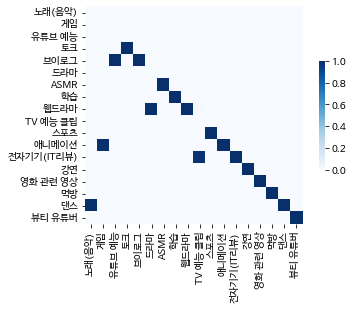

In [ ]:
sns.heatmap(b, cmap='Blues', vmin=0, vmax=1, center=.5,
            square=True, cbar_kws={"shrink": .5},
            xticklabels = 1, yticklabels = 1)

행 단위로 남색이면 clustered.

4행에서 4,9,18

10행에서 3,10

11행 7, 11

14행 2, 14

15행 12, 15

19행 1, 19



In [ ]:
matrix_prob.columns = range(0, 18)

In [ ]:
matrix_prob

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
노래(음악),0.542636,0.007752,0.023256,0.054264,0.031008,0.023256,0.023256,0.038760,0.007752,0.100775,0.077519,0.007752,0.007752,0.007752,0.007752,0.015504,0.023256,0.000000
게임,0.052632,0.263158,0.078947,0.052632,0.000000,0.000000,0.052632,0.105263,0.052632,0.078947,0.078947,0.026316,0.026316,0.026316,0.052632,0.000000,0.026316,0.026316
유튜브 예능,0.139535,0.139535,0.046512,0.162791,0.069767,0.000000,0.000000,0.023256,0.116279,0.116279,0.000000,0.023256,0.023256,0.023256,0.000000,0.069767,0.046512,0.000000
토크,0.189189,0.135135,0.108108,0.108108,0.054054,0.000000,0.027027,0.027027,0.027027,0.054054,0.054054,0.027027,0.027027,0.027027,0.108108,0.000000,0.000000,0.027027
브이로그,0.137931,0.034483,0.241379,0.137931,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.068966,0.000000,0.000000,0.000000,0.000000,0.034483,0.137931
드라마,0.000000,0.043478,0.000000,0.043478,0.000000,0.260870,0.000000,0.000000,0.000000,0.130435,0.130435,0.043478,0.000000,0.000000,0.086957,0.086957,0.173913,0.000000
ASMR,0.076923,0.000000,0.153846,0.000000,0.076923,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000
학습,0.127660,0.063830,0.000000,0.063830,0.021277,0.021277,0.042553,0.319149,0.042553,0.042553,0.063830,0.021277,0.021277,0.063830,0.042553,0.000000,0.042553,0.000000
웹드라마,0.150000,0.000000,0.150000,0.000000,0.050000,0.350000,0.000000,0.000000,0.000000,0.150000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000
TV 예능 클립,0.172414,0.034483,0.137931,0.000000,0.068966,0.034483,0.000000,0.068966,0.051724,0.241379,0.034483,0.000000,0.017241,0.051724,0.017241,0.017241,0.051724,0.000000


In [ ]:
matrix_prob.idxmax(axis=1)

노래(음악)         0
게임             1
유튜브 예능         3
토크             0
브이로그           2
드라마            5
ASMR           2
학습             7
웹드라마           5
TV 예능 클립       9
스포츠           10
애니메이션          1
전자기기(IT리뷰)     9
강연             0
영화 관련 영상       2
먹방             0
댄스             0
뷰티 유튜버        17
dtype: int64

In [ ]:
matrix_prob.idxmax(axis=1)['댄스']

0

In [ ]:
typelist.remove('버츄얼 유튜버')
typelist.remove('뉴스')

In [ ]:
c1 = [2, 4]
c2 = [5, 8]
c3 = [1, 11]
c4 = [9, 12]
c5 = [0, 16]
c6 = [3]
c7 = [6]
c8 = [7]
c9 = [10]
c10 = [13]
c11 = [14]
c12 = [15]
c13 = [17]

In [ ]:
d1 = [9, 18, 6, 12, 11, 17, 2, 4, 16]
d2 = [1, 3, 5, 7, 8, 10, 13, 14, 15]

In [ ]:
for i in range(-1, 17):
  i=i+1
  uu=0
  if matrix_prob.idxmax(axis=1)[i] in d1 and i in d1:
    uu=uu+1
  elif matrix_prob.idxmax(axis=1)[i] in d2 and i in d2:
    uu=uu
  print(uu)

0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1


In [ ]:
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

NameError: ignored

In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 2))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)



NameError: ignored

In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 3))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 4))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 5))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 6))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 7))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 8))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 9))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob=pd.DataFrame(np.linalg.matrix_power(matrix_prob, 10))
for i in range(-1, 17):
  i=i+1
  j=0
  if matrix_prob.idxmax(axis=1)[i] in c1 and i in c1:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c2 and i in c2:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c3 and i in c3:  
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c4 and i in c4:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c5 and i in c5:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c6 and i in c6:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c7 and i in c7:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c8 and i in c8:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c9 and i in c9:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c10 and i in c10:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c11 and i in c11:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c12 and i in c12:
    j=j+1
  elif matrix_prob.idxmax(axis=1)[i] in c13 and i in c13:
    j=j+1

  print(j)

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [ ]:
matrix_prob

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.370314,0.032561,0.048573,0.050539,0.039799,0.029794,0.021405,0.055391,0.020493,0.101292,0.087676,0.015208,0.011839,0.021935,0.029266,0.020371,0.034307,0.009238
1,0.142779,0.114465,0.070524,0.051533,0.035551,0.036213,0.037246,0.094487,0.043388,0.085630,0.081092,0.026748,0.018049,0.038058,0.045719,0.020474,0.034429,0.023616
2,0.202431,0.085641,0.087298,0.060414,0.054285,0.048447,0.020279,0.047854,0.027027,0.101677,0.055818,0.032518,0.017026,0.024010,0.048936,0.023319,0.033595,0.029426
3,0.202988,0.089520,0.079448,0.066600,0.051351,0.027663,0.027264,0.059703,0.035314,0.079086,0.078249,0.029563,0.016427,0.030530,0.040010,0.030448,0.026221,0.029615
4,0.184101,0.099067,0.085304,0.099523,0.062117,0.003208,0.031641,0.023791,0.044128,0.060991,0.066036,0.035986,0.013525,0.018912,0.029822,0.025496,0.036204,0.080148
5,0.144839,0.059507,0.046046,0.035753,0.033954,0.078348,0.009074,0.034375,0.014351,0.111932,0.104747,0.042309,0.018625,0.020893,0.079461,0.060838,0.087521,0.017428
6,0.137901,0.047133,0.072976,0.065591,0.053719,0.100916,0.035349,0.097834,0.036866,0.073046,0.062727,0.031760,0.010012,0.038426,0.040828,0.035560,0.048746,0.010610
7,0.192309,0.064142,0.047220,0.052419,0.034137,0.041054,0.033965,0.143733,0.028792,0.074510,0.084431,0.028052,0.015723,0.045990,0.047437,0.015589,0.038532,0.011966
8,0.163912,0.057576,0.047962,0.062535,0.032358,0.099965,0.005101,0.023615,0.027951,0.124863,0.086486,0.035918,0.009644,0.017916,0.045322,0.051343,0.091263,0.016272
9,0.222559,0.054410,0.074814,0.056469,0.053240,0.042049,0.014003,0.065749,0.037031,0.127990,0.063182,0.023186,0.014561,0.032629,0.027924,0.028056,0.049025,0.013125


In [ ]:
import numpy as np

# Write the array here.

one_step_transition = np.array(matrix_prob)

def steady_state_prop(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)

steady_state_matrix = steady_state_prop(one_step_transition)
print (steady_state_matrix)

[0.23707409 0.06302072 0.06210628 0.05534546 0.0456732  0.03589435
 0.02470061 0.06550842 0.0284645  0.09045077 0.0862205  0.02666976
 0.01453657 0.0292767  0.04112696 0.02810678 0.03977777 0.02604657]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0671b56b50>]],
      dtype=object)

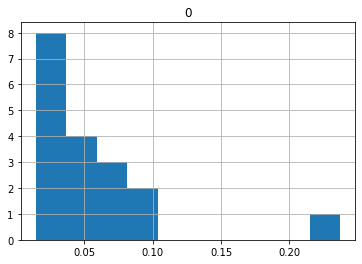

In [ ]:
pd.DataFrame(steady_state_matrix).hist()